In [1]:
#List the files of the directory --> collected from crawler
import os
import numpy as np
file_name = os.listdir(os.getcwd())

print file_name

['.ipynb_checkpoints', '.picasa.ini', 'centos5.11.6a77cdcd4e51.0', 'centos5.a0f8e1c9ede0.0', 'centos6.6.19494226358d.0', 'centos6.7.55c7f40f0eac.0', 'centos6.8.7f4c7d980794.0', 'centos6.9.fc5fcc54e9be.0', 'centos6.a8b14a36fb59.0', 'centos7.0.1406.f6175eb9936f.0', 'centos7.1.1503.97bb3c044d41.0', 'centos7.2.1511.3396d9e7ba26.0', 'centos7.3.1611.90e3d7fbcc20.0', 'centos7.4.1708.558fa9c5643a.0', 'centos7.59d57860f4ae.0', 'Crawler Metric Processing - 2.ipynb', 'crawler metric processing.ipynb', 'crawler_collected_files', 'Crawler_Exercise', 'created_dataset_X.pkl', 'created_dataset_X_reduced.pkl', 'dummy.txt', 'dummy_image.png', 'filename.png', 'P2180019.JPG', 'pixel_file_centos_1.png', 'pixel_file_centos_10.png', 'pixel_file_centos_11.png', 'pixel_file_centos_12.png', 'pixel_file_centos_13.png', 'pixel_file_centos_2.png', 'pixel_file_centos_3.png', 'pixel_file_centos_4.png', 'pixel_file_centos_5.png', 'pixel_file_centos_6.png', 'pixel_file_centos_7.png', 'pixel_file_centos_8.png', 'pixel_

In [2]:
#Creating a dictorinay that holds the unigram path value of file collected by crawler
Feature_dictionary = {}

#Processing for the centos container
filecounter = 0
for metric_file in file_name:
    if metric_file.startswith('c') and metric_file.endswith('0'):
        filecounter=filecounter+1
        fp = open(metric_file, "r")
        line_holder=[]
        for line in fp:
            if line.startswith('file'):
                unigram = line.split('\t')[1]    
                line_holder.append(unigram)
        Feature_dictionary['file_centos_{0}'.format(filecounter)] = line_holder   
        print "Number of records in file {0} : {1}".format(metric_file,len(line_holder))

#Processing for the ubuntu container
filecounter = 0
for metric_file in file_name:
    if metric_file.startswith('u') and metric_file.endswith('0'):
        filecounter=filecounter+1
        fp = open(metric_file, "r")
        line_holder=[]
        for line in fp:
            if line.startswith('file'):
                unigram = line.split('\t')[1]    
                line_holder.append(unigram)
        Feature_dictionary['file_ubuntu_{0}'.format(filecounter)] = line_holder   
        print "Number of records in file {0} : {1}".format(metric_file,len(line_holder))
   

Number of records in file centos5.11.6a77cdcd4e51.0 : 17193
Number of records in file centos5.a0f8e1c9ede0.0 : 17214
Number of records in file centos6.6.19494226358d.0 : 10945
Number of records in file centos6.7.55c7f40f0eac.0 : 8840
Number of records in file centos6.8.7f4c7d980794.0 : 10285
Number of records in file centos6.9.fc5fcc54e9be.0 : 10299
Number of records in file centos6.a8b14a36fb59.0 : 10263
Number of records in file centos7.0.1406.f6175eb9936f.0 : 10597
Number of records in file centos7.1.1503.97bb3c044d41.0 : 10648
Number of records in file centos7.2.1511.3396d9e7ba26.0 : 9421
Number of records in file centos7.3.1611.90e3d7fbcc20.0 : 9784
Number of records in file centos7.4.1708.558fa9c5643a.0 : 9859
Number of records in file centos7.59d57860f4ae.0 : 9819
Number of records in file ubuntu10.04.e11366eb15a4.0 : 8470
Number of records in file ubuntu12.04.2c67f0261f71.0 : 6561
Number of records in file ubuntu12.04.5.1a0e573b9665.0 : 6561
Number of records in file ubuntu12.1

In [3]:
Feature_dictionary_keys = Feature_dictionary.keys()
unique_unigrams = []
for dict_key in Feature_dictionary_keys:
    unique_unigrams.append(list(set(Feature_dictionary[dict_key])))
    
unique_unigrams_flat = [item for sublist in unique_unigrams for item in sublist]

In [4]:
print len(set(unique_unigrams_flat)), 'are unique codes out of:', len(unique_unigrams_flat)

49288 are unique codes out of: 270800


In [5]:
unique_unigrams_list = list(set(unique_unigrams_flat))
Feature_dictionary_encoded = {}
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(unique_unigrams_list))
int_to_char = dict((i, c) for i, c in enumerate(unique_unigrams_list))

# integer encode input data
for dict_key in Feature_dictionary_keys:
    Feature_dictionary_encoded[dict_key] = [char_to_int[char] for char in Feature_dictionary[dict_key]]

In [6]:
#Finding the maximum length of file (maximum number of lines) from all the collected files
pixel_files_length = []

for dict_key in Feature_dictionary_keys:
    pixel_files_length.append(len(Feature_dictionary_encoded[dict_key]))
    
maximum_pixel_files_length = max(pixel_files_length)
print "Maximum number of lines among all the files is:",maximum_pixel_files_length

Maximum number of lines among all the files is: 17214


In [7]:
#Pad the file so that all the files have equal number of lines. 
#Doing this make all the images of equal size (pixel)
def pixel_padding(given_list, n, fillvalue=0):
    for steps in range(n - len(given_list)):
        given_list.append(fillvalue)
    return given_list

for dict_key in Feature_dictionary_keys:
    Feature_dictionary_encoded[dict_key] = pixel_padding(Feature_dictionary_encoded[dict_key], maximum_pixel_files_length)

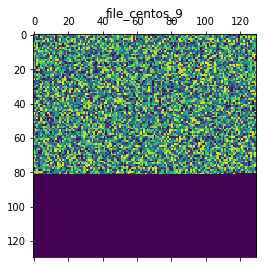

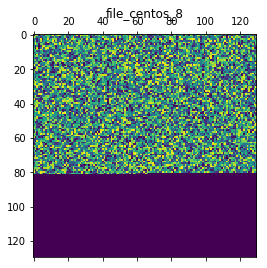

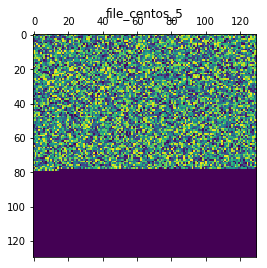

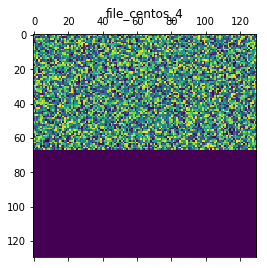

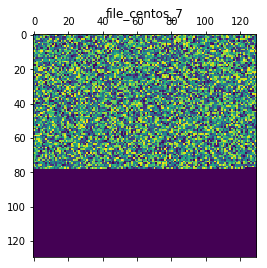

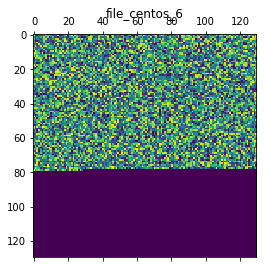

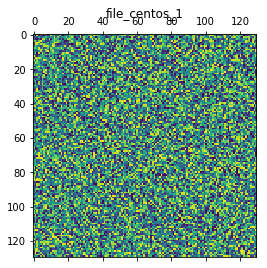

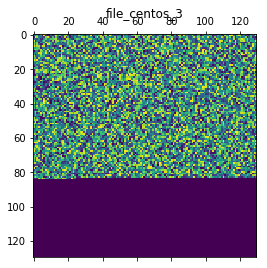

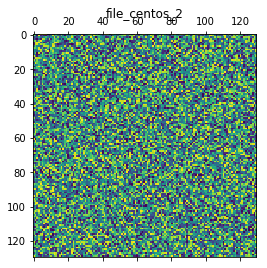

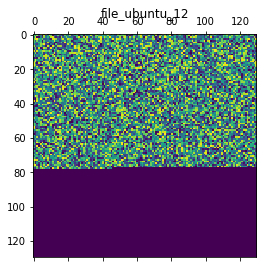

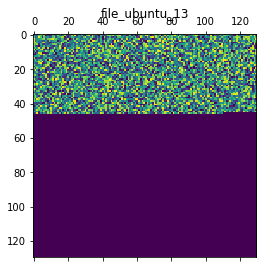

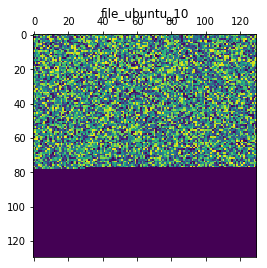

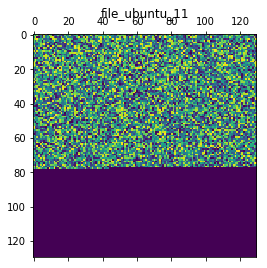

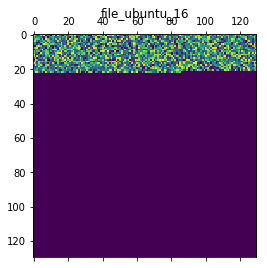

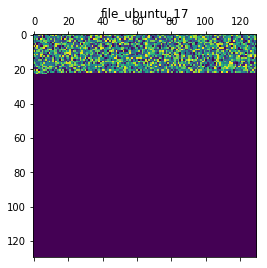

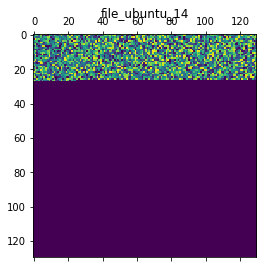

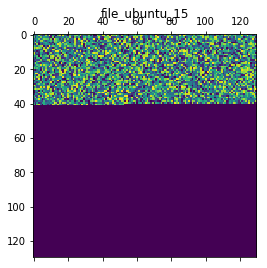

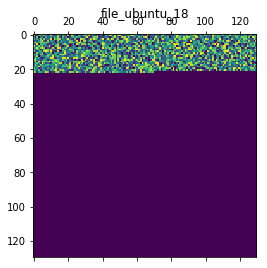

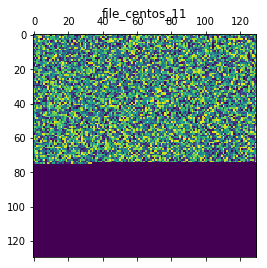

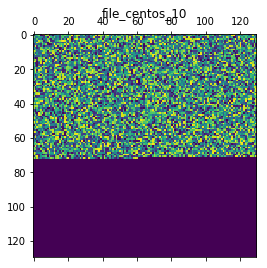

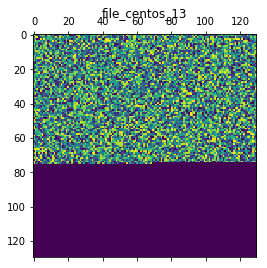

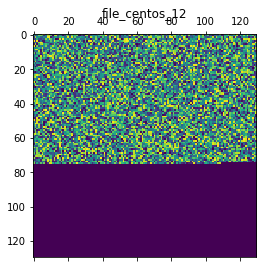

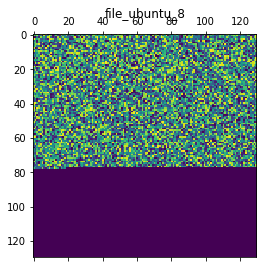

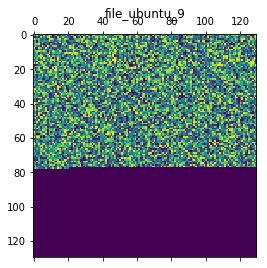

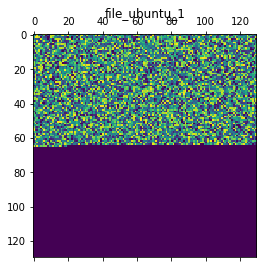

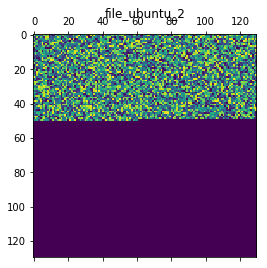

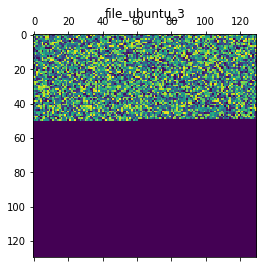

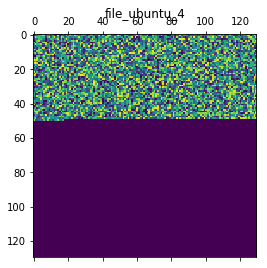

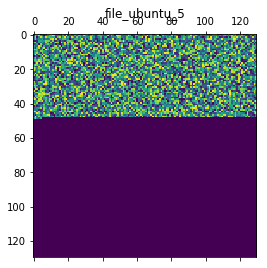

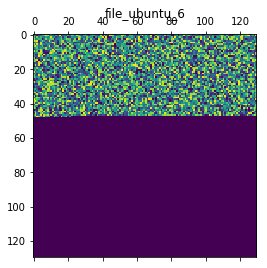

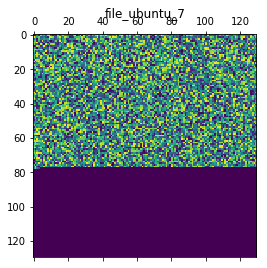

In [8]:
#Plotting the image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Ploting with matshow
for dict_key in Feature_dictionary_keys:
    #plt.imsave(dict_key+'.png', np.array(Image_ubunut_centos_dictionary[dict_key]))
    image_matrix = np.array(Feature_dictionary_encoded[dict_key])
    image_matrix.resize((130,130),refcheck=False);
    plt.matshow(image_matrix)
    plt.title(dict_key)
    plt.show()

In [ ]:
#Dump the created dataset (concatenating pixel) with pickle
created_dataset_X = []
created_dataset_label= Feature_dictionary_keys[:]
for dict_key in Feature_dictionary_keys:
    created_dataset_X.append(np.array(Feature_dictionary_encoded[dict_key]))

import pickle
with open('created_dataset_X.pkl', 'wb') as f:
    pickle.dump(created_dataset_X, f)

In [ ]:
for i in range(len(Feature_dictionary_keys)):
    if 'centos' in created_dataset_label[i]:
        created_dataset_label[i] = 0      #0 for centos
    else:
        created_dataset_label[i] = 1     #1 for ubuntu

print len(created_dataset_label), created_dataset_label

In [19]:
from PIL import Image

#Extracting RGC pixels
for dict_key in Feature_dictionary_keys:
    image_matrix = np.array(Feature_dictionary_encoded[dict_key])
    image_matrix.resize((130,130),refcheck=False);
    image_matrix_R = np.zeros((130,130), dtype=int)
    image_matrix_G = np.zeros((130,130), dtype=int)
    image_matrix_B = np.zeros((130,130), dtype=int)    
    for i in range(len(image_matrix)):
        for j in range(len(image_matrix)):
            image_matrix_R[i,j] = int("{0:#024b}".format(image_matrix[i,j])[:8],2)
            image_matrix_G[i,j] = int("{0:#024b}".format(image_matrix[i,j])[8:16],2)
            image_matrix_B[i,j] = int("{0:#024b}".format(image_matrix[i,j])[16:24],2)
    #complete_image = [image_matrix_R, image_matrix_G, image_matrix_B]
    complete_image = np.zeros((130,130,3), dtype=int)
    complete_image[:,:,0]=image_matrix_R
    complete_image[:,:,1]=image_matrix_G
    complete_image[:,:,2]=image_matrix_B
    #print complete_image.shape
    im = Image.fromarray(np.uint8(complete_image))
    im.save(dict_key+'.png')